In [41]:
from surprise import SVD, BaselineOnly, KNNBasic
from utils import cold_start_train, evaluate 
import rdfsvd
from fuzzy import *
import cluster
import importlib
import ensemble

In [11]:
n_revealed = [1, 2, 3, 5, 10]
baseline_results = []
svd_results = []
knn_results = []

for n in n_revealed:
    baseline = BaselineOnly()
    svd = SVD()

    # collaborative filtering baseline method
    knn = KNNBasic()

    #partial cold start
    trainset, testset = cold_start_train(n=n)
    # cold_start_cross_validate(baseline)
    # cold_start_cross_validate(svd)
    # cold_start_cross_validate(knn)


    baseline.fit(trainset)
    svd.fit(trainset)
    knn.fit(trainset)


    baseline_results.append(evaluate(testset, baseline))
    svd_results.append(evaluate(testset, svd))
    knn_results.append(evaluate(testset, knn))
    print(f"n_revealed={n} done.")

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0479
MAE:  0.8290
RMSE: 1.0519
MAE:  0.8345
RMSE: 1.0760
MAE:  0.8525
n_revealed=1 done.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0481
MAE:  0.8280
RMSE: 1.0522
MAE:  0.8322
RMSE: 1.0506
MAE:  0.8320
n_revealed=2 done.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0331
MAE:  0.8194
RMSE: 1.0353
MAE:  0.8229
RMSE: 1.0425
MAE:  0.8245
n_revealed=3 done.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.0170
MAE:  0.8073
RMSE: 1.0128
MAE:  0.8058
RMSE: 1.0370
MAE:  0.8192
n_revealed=5 done.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9880
MAE:  0.7888
RMSE: 0.9815
MAE:  0.7839
RMSE: 1.0262
MAE:  0.8100
n_revealed=10 

In [24]:
rdfsvd_results = []
for n in n_revealed:
    trainset, testset = cold_start_train(n=n)
    alg = rdfsvd.RDFSVD(trainset.n_users, trainset.n_items)
    #print(alg.bu)
    alg.fit(trainset)
    print("Training Complete for n_revealed =", n)
    rdfsvd_results.append(evaluate(testset, alg))

Training Complete for n_revealed = 1
RMSE: 1.3900
MAE:  1.0850
Training Complete for n_revealed = 2
RMSE: 1.3520
MAE:  1.0525
Training Complete for n_revealed = 3
RMSE: 1.3613
MAE:  1.0604
Training Complete for n_revealed = 5
RMSE: 1.3231
MAE:  1.0266
Training Complete for n_revealed = 10
RMSE: 1.2722
MAE:  0.9871


In [22]:
cluster_results = []
for n in n_revealed:
    trainset, testset = cold_start_train(n=n)
    alg = cluster.Cluster()
    alg.fit(trainset)
    print("Training Complete for n_revealed =", n)
    cluster_results.append(evaluate(testset, alg))

c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Training Complete for n_revealed = 1
RMSE: 1.1494
MAE:  0.9604


c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Training Complete for n_revealed = 2
RMSE: 1.1498
MAE:  0.9607


c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Training Complete for n_revealed = 3
RMSE: 1.1493
MAE:  0.9602


c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Training Complete for n_revealed = 5
RMSE: 1.1490
MAE:  0.9595
Training Complete for n_revealed = 10
RMSE: 1.1518
MAE:  0.9616


c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [15]:
fuzzy_results = []
data = Dataset.load_builtin("ml-100k")
for n in n_revealed:
    # Partial cold-start split using utils (Surprise)
    trainset, testset = cold_start_train(data, cold_start_user_portion=0.2, n=n, random_seed=FUZZY_RANDOM_SEED)

    # Train fuzzy user model via AlgoBase API
    fuzzy_algo = FuzzyAlgo(n_clusters = FUZZY_NUM_CLUSTERS, friends_k = FRIENDS_K, combo_c = COMBINATION_COEFF_C, random_seed = FUZZY_RANDOM_SEED).fit(trainset)
    print(f"Train ratings: {len(fuzzy_algo.train_df):,} | Test triples: {len(testset):,}")
    print("Fuzzy user model trained.")

    # Evaluate via Surprise-style API (AlgoBase)
    fuzzy_results.append(evaluate(testset, fuzzy_algo, k=10, relevance_threshold=3.5))

Train ratings: 80,076 | Test triples: 19,924
Fuzzy user model trained.
RMSE: 1.3796
MAE:  1.0505
Train ratings: 80,265 | Test triples: 19,735
Fuzzy user model trained.
RMSE: 1.2746
MAE:  0.9948
Train ratings: 80,454 | Test triples: 19,546
Fuzzy user model trained.
RMSE: 1.2045
MAE:  0.9378
Train ratings: 80,832 | Test triples: 19,168
Fuzzy user model trained.
RMSE: 1.1499
MAE:  0.8969
Train ratings: 81,687 | Test triples: 18,133
Fuzzy user model trained.
RMSE: 1.1311
MAE:  0.8818


In [42]:
ensemble_results = []
for n in n_revealed:
    trainset, testset = cold_start_train(n=n)
    alg = ensemble.Ensemble()
    alg.fit(trainset)
    print("Training Complete for n_revealed =", n)
    ensemble_results.append(evaluate(testset, alg))

c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Training Complete for n_revealed = 1
RMSE: 1.1330
MAE:  0.9100


c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Training Complete for n_revealed = 2
RMSE: 1.1058
MAE:  0.8876


c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Training Complete for n_revealed = 3
RMSE: 1.0937
MAE:  0.8754


c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Training Complete for n_revealed = 5
RMSE: 1.0835
MAE:  0.8664


c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\tomga\miniconda3\envs\rec\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Training Complete for n_revealed = 10
RMSE: 1.0449
MAE:  0.8388


In [43]:
import numpy as np
import matplotlib.pyplot as plt

# helper: extract index i from each (rmse, mae, precision, recall)
def extract_metric(results_list, idx):
    return [t[idx] for t in results_list]

# index mapping: 0=rmse, 1=mae, 2=precision, 3=recall
baseline_rmse   = extract_metric(baseline_results, 0)
svd_rmse        = extract_metric(svd_results,      0)
knn_rmse        = extract_metric(knn_results,      0)
rdfsvd_rmse     = extract_metric(rdfsvd_results,   0)
fuzzy_rmse      = extract_metric(fuzzy_results,    0)
cluster_rmse    = extract_metric(cluster_results,  0)
ensemble_rmse   = extract_metric(ensemble_results, 0)

baseline_mae    = extract_metric(baseline_results, 1)
svd_mae         = extract_metric(svd_results,      1)
knn_mae         = extract_metric(knn_results,      1)
rdfsvd_mae      = extract_metric(rdfsvd_results,   1)
fuzzy_mae       = extract_metric(fuzzy_results,    1)
cluster_mae     = extract_metric(cluster_results,  1)
ensemble_mae    = extract_metric(ensemble_results, 1)

baseline_prec   = extract_metric(baseline_results, 2)
svd_prec        = extract_metric(svd_results,      2)
knn_prec        = extract_metric(knn_results,      2)
rdfsvd_prec     = extract_metric(rdfsvd_results,   2)
fuzzy_prec      = extract_metric(fuzzy_results,    2)
cluster_prec    = extract_metric(cluster_results,  2)
ensemble_prec   = extract_metric(ensemble_results, 2)

baseline_recall = extract_metric(baseline_results, 3)
svd_recall      = extract_metric(svd_results,      3)
knn_recall      = extract_metric(knn_results,      3)
rdfsvd_recall   = extract_metric(rdfsvd_results,   3)
fuzzy_recall    = extract_metric(fuzzy_results,    3)
cluster_recall  = extract_metric(cluster_results,  3)
ensemble_recall = extract_metric(ensemble_results, 3)


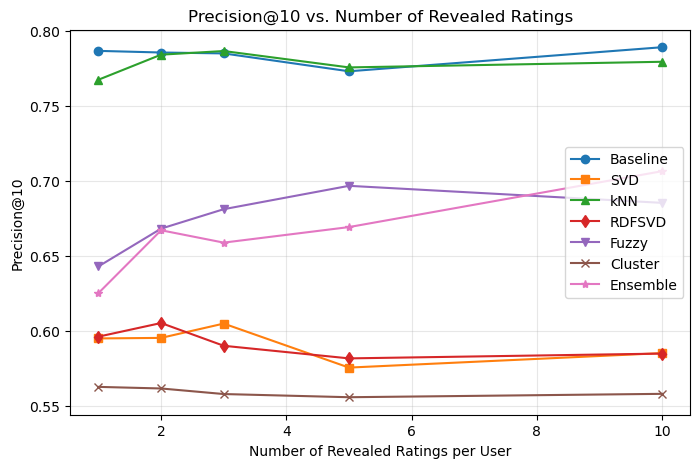

In [44]:
x = np.array(n_revealed)

plt.figure(figsize=(8, 5))

# --- Precision@10 subplot ---
plt.plot(x, baseline_prec, marker="o", label="Baseline")
plt.plot(x, svd_prec,      marker="s", label="SVD")
plt.plot(x, knn_prec,      marker="^", label="kNN")
plt.plot(x, rdfsvd_prec,   marker="d", label="RDFSVD")
plt.plot(x, fuzzy_prec,    marker="v", label="Fuzzy")
plt.plot(x, cluster_prec,  marker="x", label="Cluster")
plt.plot(x, ensemble_prec, marker="*", label="Ensemble")

plt.xlabel("Number of Revealed Ratings per User")
plt.ylabel("Precision@10")
plt.title("Precision@10 vs. Number of Revealed Ratings")
plt.legend()
plt.grid(True, alpha=0.3)


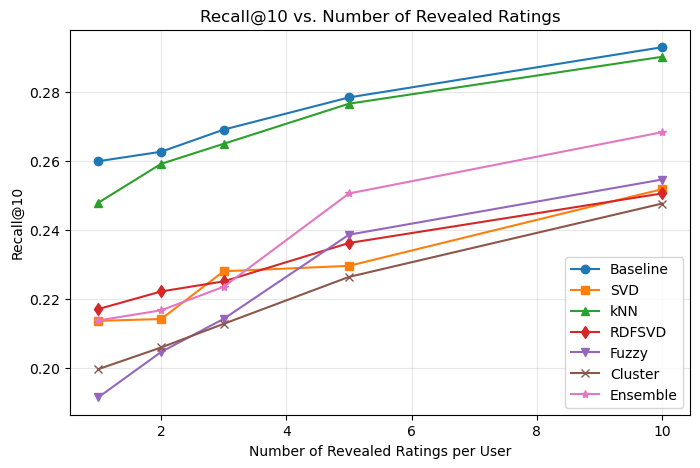

In [45]:
plt.figure(figsize=(8, 5))
plt.plot(x, baseline_recall, marker="o", label="Baseline")
plt.plot(x, svd_recall,      marker="s", label="SVD")
plt.plot(x, knn_recall,      marker="^", label="kNN")
plt.plot(x, rdfsvd_recall,   marker="d", label="RDFSVD")
plt.plot(x, fuzzy_recall,    marker="v", label="Fuzzy")
plt.plot(x, cluster_recall,  marker="x", label="Cluster")
plt.plot(x, ensemble_recall, marker="*", label="Ensemble")

plt.xlabel("Number of Revealed Ratings per User")
plt.ylabel("Recall@10")
plt.title("Recall@10 vs. Number of Revealed Ratings")
plt.legend()
plt.grid(True, alpha=0.3)

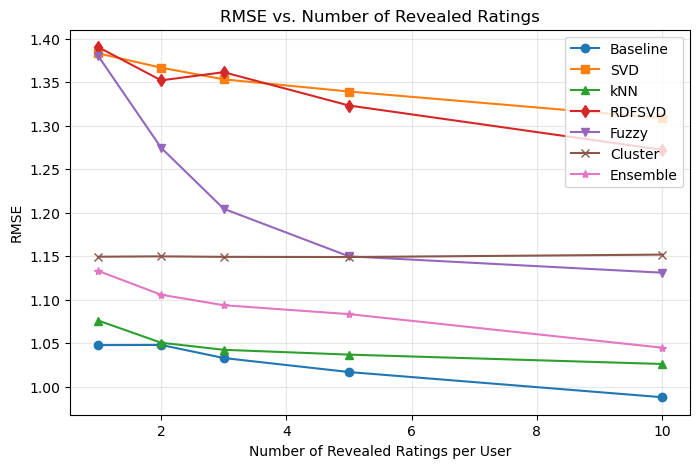

In [46]:
x = np.array(n_revealed)

plt.figure(figsize=(8, 5))

# --- rmse subplot ---
plt.plot(x, baseline_rmse, marker="o", label="Baseline")
plt.plot(x, svd_rmse,      marker="s", label="SVD")
plt.plot(x, knn_rmse,      marker="^", label="kNN")
plt.plot(x, rdfsvd_rmse,   marker="d", label="RDFSVD")
plt.plot(x, fuzzy_rmse,    marker="v", label="Fuzzy")
plt.plot(x, cluster_rmse,  marker="x", label="Cluster")
plt.plot(x, ensemble_rmse, marker="*", label="Ensemble")

plt.xlabel("Number of Revealed Ratings per User")
plt.ylabel("RMSE")
plt.title("RMSE vs. Number of Revealed Ratings")
plt.legend()
plt.grid(True, alpha=0.3)



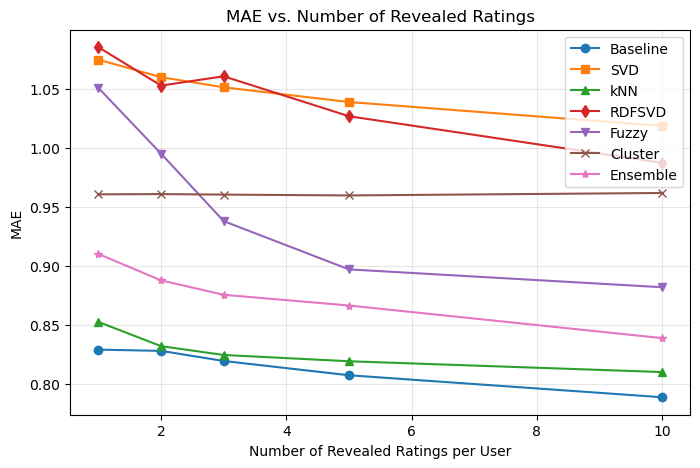

In [47]:
plt.figure(figsize=(8, 5))
plt.plot(x, baseline_mae, marker="o", label="Baseline")
plt.plot(x, svd_mae,      marker="s", label="SVD")
plt.plot(x, knn_mae,      marker="^", label="kNN")
plt.plot(x, rdfsvd_mae,   marker="d", label="RDFSVD")
plt.plot(x, fuzzy_mae,    marker="v", label="Fuzzy")
plt.plot(x, cluster_mae,  marker="x", label="Cluster")
plt.plot(x, ensemble_mae, marker="*", label="Ensemble")

plt.xlabel("Number of Revealed Ratings per User")
plt.ylabel("MAE")
plt.title("MAE vs. Number of Revealed Ratings")
plt.legend()
plt.grid(True, alpha=0.3)

In [ ]:
models = ['baseline', 'svd', 'knn', 'rdfsvd', 'fuzzy', 'cluster', 'ensemble']
metrics = ["prec", "recall", "rmse", "mae"]
for metric in metrics:
    for model in models:
        print(f"{model} {metric}: ", end="")
        print(eval(f"{model}_{metric}"))

baseline prec: [0.7865520282186952, 0.7854665322919293, 0.7848660451835061, 0.7729696816998408, 0.7889814814814821]
svd prec: [0.5952087007642562, 0.5955614344503236, 0.6050873435794075, 0.5758020492147478, 0.585440917107584]
knn prec: [0.7673595364071556, 0.7840283026790966, 0.7864491475602585, 0.7755458973712942, 0.7792967372134043]
rdfsvd prec: [0.5963970773494581, 0.6054631729234905, 0.5903166204753503, 0.5819265977996141, 0.5851234567901233]
fuzzy prec: [0.6431363903586124, 0.6682707650961617, 0.6812022339800118, 0.6967519106407992, 0.6854166666666666]
cluster prec: [0.5629629629629631, 0.561904761904762, 0.5582010582010586, 0.5560846560846564, 0.5583333333333337]
baseline recall: [0.259840370969032, 0.2625754053689618, 0.2689913660579689, 0.278326263604661, 0.2928821853859964]
svd recall: [0.21354850008939097, 0.21407018241713066, 0.2279267393115887, 0.22949210518141896, 0.2517173366197941]
knn recall: [0.24783026124734947, 0.259065694931502, 0.2648878655863112, 0.276509222531784